In [73]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import numpy as np
import ntplib

In [37]:
url = 'http://ooiufs01.ooi.rutgers.edu:12576/sensor/inv/RS03AXPS/SF03A/4A-NUTNRA301/' + \
'streamed/nutnr_a_sample?limit=9999&user=pete&parameters=2443%2C315%2C7'

In [38]:
response = requests.get(url)

In [39]:
result = response.json()

In [41]:
data = result

In [42]:
times = []
nitrate = []
corrected = []
for each in data:
    times.append(each['time'])
    nitrate.append(each['nitrate_concentration'])
    corrected.append(each.get('temp_sal_corrected_nitrate'))
    
edge = corrected.index(None)
times = times[:edge]
nitrate = nitrate[:edge]
corrected = corrected[:edge]

In [43]:
times = np.array(times)
nitrate = np.array(nitrate)
corrected = np.array(corrected)

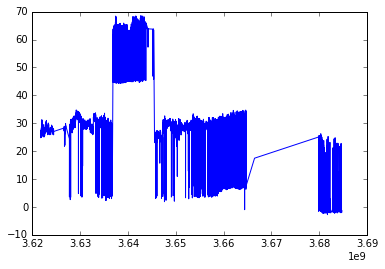

In [45]:
plt.plot(times, nitrate)

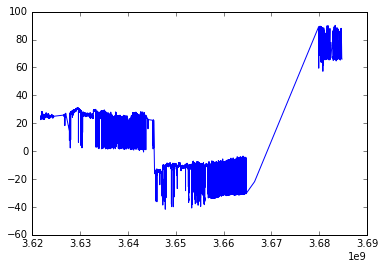

In [46]:
plt.plot(times, corrected)

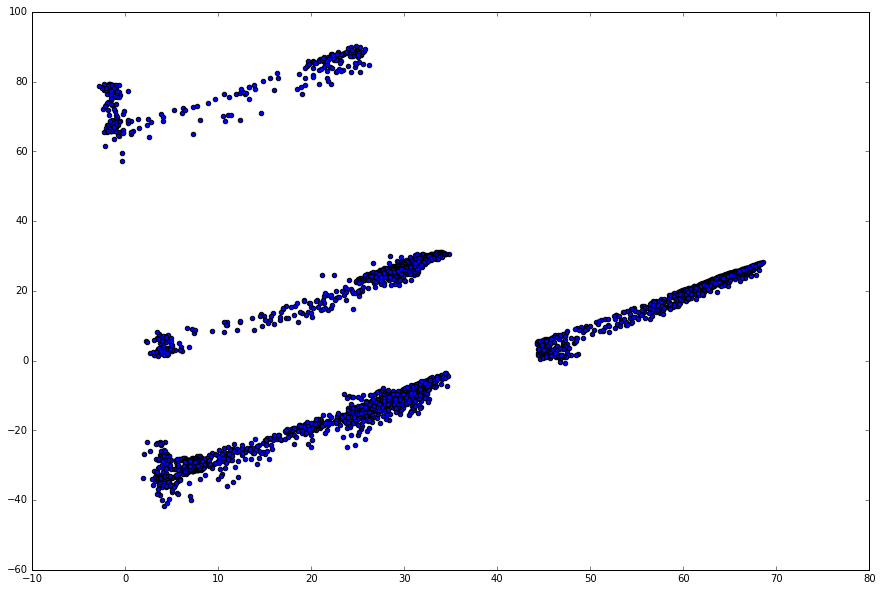

In [77]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.scatter(nitrate, corrected)

In [48]:
deployment1 = 1411842780000, 1436400000000
deployment2 = 1436415360000, 1468454400000
deployment3 = 1468531080000, None

In [50]:
import ntplib
deployment1_end = ntplib.system_to_ntp_time(deployment1[1] / 1000.0)
deployment2_end = ntplib.system_to_ntp_time(deployment2[1] / 1000.0)

In [51]:
times[times<deployment1_end]

array([  3.62170771e+09,   3.62171162e+09,   3.62171882e+09, ...,
         3.64535641e+09,   3.64536555e+09,   3.64537117e+09])

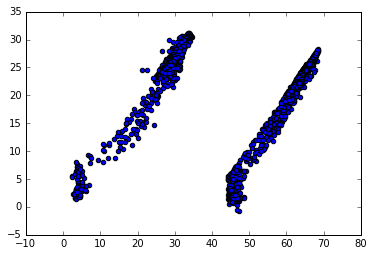

In [52]:
plt.scatter(nitrate[times<deployment1_end], corrected[times<deployment1_end])

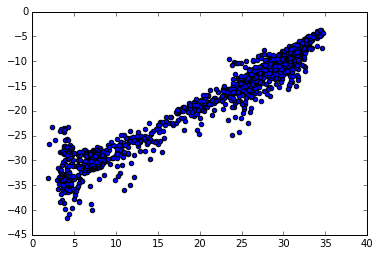

In [54]:
mask = (times < deployment2_end) & (times > deployment1_end)
plt.scatter(nitrate[mask], corrected[mask])

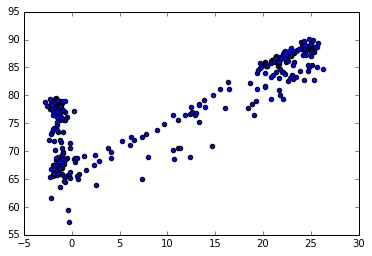

In [55]:
mask = times > deployment2_end
plt.scatter(nitrate[mask], corrected[mask])

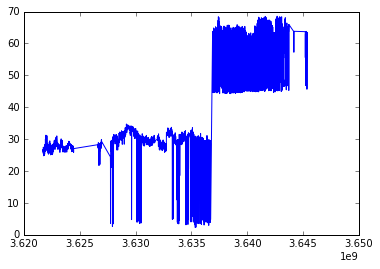

In [56]:
mask = times < deployment1_end
plt.plot(times[mask], nitrate[mask])

In [61]:
import pandas as pd

In [75]:
offset = ntplib.system_to_ntp_time(0)
df = pd.DataFrame(dict(nitrate=nitrate, corrected=corrected), index=pd.to_datetime(times-offset, unit='s'))

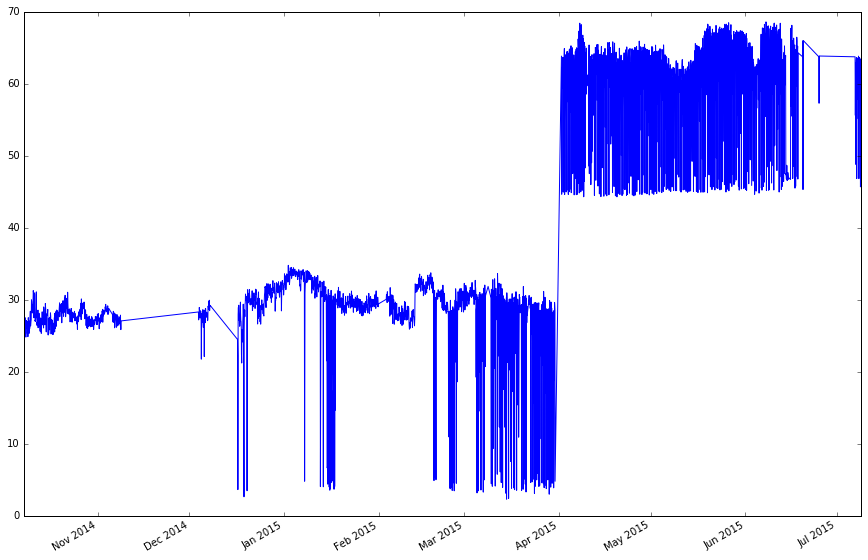

In [79]:
mask = times < deployment1_end
df.nitrate[mask].plot()

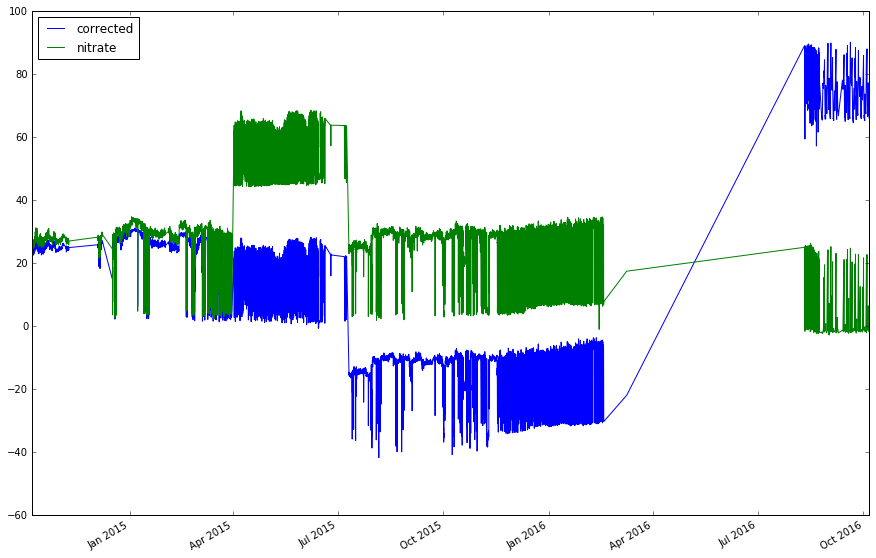

In [81]:
df.plot()